In [1]:
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)
plt.style.use("~/.dracula.mplstyle")
import scipy.stats as scp

In [2]:
class DataImport:
    
    def __init__(self, filename, add_ind=[]):
        self.xlsx = pd.ExcelFile(filename)
        self.add_ind = add_ind # Additional indices to try to 
        
        print(f"Read in <{filename}>.")
        self.sheets = []
        print('-'*20, "Reading Sheets ", '-'*20)
        self.read_sheets()
        print('-'*20, "Setting Indices", '-'*20)
        self.set_indices()
        print('-'*20, "Checking Nulls ", '-'*20)
        self.check_nulls()
        print("\n\n")
    
    def read_sheets(self):
        for i, s in enumerate(self.xlsx.sheet_names):
            read_sheet = self.xlsx.parse(s)
            print(f"Sheet {i}: {s}; shape={read_sheet.shape}")
            self.sheets.append(read_sheet)
    
    def set_indices(self):
        for s in self.sheets:
            for d in ["date", "Date", "Unnamed: 0"]+self.add_ind:
                try:
                    s.set_index(d, inplace=True) # Date as index
                    break
                except KeyError:
                    continue
    
    def check_nulls(self):
        n = 0
        for i, s in enumerate(self.sheets[1:]):
            has_nulls = True
            while has_nulls:
                try:
                    assert sum(s.isna().sum())==0 # Check for nulls
                    has_nulls = False
                except AssertionError:
                    print(f"Null values found in <{i}>. Interpolating linearly.")
                    s = s.interpolate() # Linerly interpolate nulls
                    n += 1
        if n==0: print("No nulls found :)")

xl = DataImport("momentum.xlsx")
xl.sheets[0]

Read in <momentum.xlsx>.
-------------------- Reading Sheets  --------------------
Sheet 0: descriptions; shape=(8, 5)
Sheet 1: factors (excess returns); shape=(1137, 4)
Sheet 2: momentum (excess returns); shape=(1137, 2)
Sheet 3: deciles (total returns); shape=(1137, 11)
Sheet 4: size_sorts (total returns); shape=(1137, 7)
Sheet 5: risk-free rate; shape=(1137, 2)
-------------------- Setting Indices --------------------
-------------------- Checking Nulls  --------------------
No nulls found :)





,Name,Unit,Construction,Description
Unnamed: 0,,,,
MKT,Market,Excess Return,Market-cap-weighted,US Equities
SMB,Size,Excess Return,Small Minus Big,Long small stocks and short big stocks
HML,Value,Excess Return,High Minus Low,Long value (high book-to-market) stocks and sh...
RF,Risk-free rate,Total Return,Tbills,NaN
SMALL LoPRIOR,Small Down,Total Return,Small Losers,Bottom 3 deciles and Small
SMALL HiPRIOR,Small Up,Total Return,Small Winners,Top 3 deciles and Small
BIG LoPRIOR,Big Down,Total Return,Big Losers,Bottom 3 deciles and Big
BIG HiPRIOR,Big Up,Total Return,Big Winners,Top 3 deciles and Big


In [3]:
fa = xl.sheets[1]
r_mom = xl.sheets[2]
de = xl.sheets[3]
ss = xl.sheets[4]
rf = xl.sheets[5]
r_m = fa["MKT"]
r_v = fa["HML"]
display(fa.head())
display(r_mom.head())
display(de.head())
display(ss.head())
display(rf.head())

,MKT,SMB,HML
Date,,,
1927-01-31,-0.0006,-0.0051,0.0473
1927-02-28,0.0418,-0.0025,0.0327
1927-03-31,0.0013,-0.0189,-0.0256
1927-04-30,0.0046,0.0049,0.0071
1927-05-31,0.0544,0.0146,0.0498


,UMD
Date,
1927-01-31,0.0036
1927-02-28,-0.0214
1927-03-31,0.0361
1927-04-30,0.0430
1927-05-31,0.0300


,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
Date,,,,,,,,,,
1927-01-31,-0.0332,-0.0446,0.0269,-0.0033,-0.0041,0.0097,0.0074,0.0036,-0.0041,-0.0024
1927-02-28,0.0753,0.0593,0.0825,0.0727,0.0322,0.0421,0.0283,0.0326,0.0420,0.0701
1927-03-31,-0.0323,-0.0301,-0.0392,-0.0477,-0.0048,-0.0242,0.0205,0.0041,0.0096,0.0547
1927-04-30,0.0204,-0.0320,-0.0247,-0.0137,0.0220,-0.0005,0.0205,-0.0059,0.0159,0.0549
1927-05-31,0.0272,0.0457,0.0595,0.0318,0.0636,0.0580,0.0496,0.0681,0.0811,0.0632


,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR
Date,,,,,,
1927-01-31,0.0008,0.0357,0.0040,-0.0040,0.0026,0.0000
1927-02-28,0.0701,0.0648,0.0551,0.0727,0.0380,0.0447
1927-03-31,-0.0346,-0.0288,-0.0206,-0.0357,-0.0018,0.0226
1927-04-30,-0.0075,-0.0048,0.0332,-0.0272,0.0075,0.0181
1927-05-31,0.0248,0.1115,0.0683,0.0552,0.0496,0.0718


,RF
Date,
1927-01-31,0.0025
1927-02-28,0.0026
1927-03-31,0.0030
1927-04-30,0.0025
1927-05-31,0.0030


# 2 Investigating Momentum

In this section, we empirically investigate some concerns regarding AQR’s new momentum product. On Canvas, find the data file, “momentum data.xlsx”.

• The first tab contains the momentum factor as an excess return: r ̃mom.

• The second tab contains returns on portfolios corresponding to scored momentum deciles.

– rmom(1) denotes the portfolio of stocks in the lowest momentum decile, the “losers” with the lowest past returns.

– rmom(10) denotes the portfolio of stocks in the highest momentum decile.

• The third tab gives portfolios sorted by momentum and size.

– rmomSU denotes the portfolio of small stocks in the top 3 deciles of momentum scores.

– rmomBD denotes the portfolio of big-stocks in the bottom 3 deciles of momentum scores.
mom:FF

Note that the Fama-French momentum return, r ̃ mom:FF 1 momBU momSU
, given in the first tab, is constructed by FF as,

#### 1 Is momentum still profitable?

The excess returns of lucrative trading strategies often disappear once the strategy is well-known. The first widely-cited paper on momentum was published in 1993. Have momentum returns or risk changed since then? The AQR case takes place at the end of 2008. Have momentum returns changed in 2009-2021?

Investigate by filling out the summary statistics below for the full-sample and three sub-samples.

(a) Using the data provided, fill in Table 1 with the appropriate stats for r ̃ .

In [4]:
def pivot_summaries(data, year_mask=None, pi=0.05, nper=12, r_m=r_m, r_v=r_v):
    if not(year_mask):
        year_mask = [(str(min(data.index).year), str(max(data.index).year))]
    
    data_melt = pd.melt(data, ignore_index=False).sort_index()
    
    pivlist = []
    for start, end in year_mask:
        r_m_m = r_m[start:end]
        r_v_m = r_v[start:end]
        def me(x): return nper * np.mean(x)
        def sd(x): return np.sqrt(nper) * np.std(x, ddof=1) # account for degrees of freedom
        def sr(x): return np.sqrt(nper) * np.mean(x) / np.std(x, ddof=1)
        def sk(x): return scp.skew(x, bias=False)
        def cm(x): return np.corrcoef(x, r_m_m)[0][1]
        def cv(x): return np.corrcoef(x, r_v_m)[0][1]
        af = [me, sd, sr, sk, cm, cv]
        af_names = ["Mean", "Vol", "Sharpe", "Skew", "corr $\tilde{r}^m$", "corr $\tilde{r}^v$"]
        
        piv = pd.pivot_table(data_melt[start:end], index="variable", values="value",
                             aggfunc=af)
        piv.columns = pd.MultiIndex.from_arrays([[f"{start}-{end}"] * len(af), af_names],
                                                names=["year", "measure"])
        pivlist.append(piv)

    summ = pd.concat(pivlist, axis=1)
    return summ

def year_to_index(df):
    return df.T.reset_index(level="year").pivot(columns="year").T

year_mask = [("1927", "2021"), ("1927", "1993"), ("1994", "2008"), ("2009", "2021")]
ps = pivot_summaries(r_mom, year_mask)
ps = year_to_index(ps)
display(ps)

measure               Mean  Sharpe    Skew    Vol  corr $\tilde{r}^m$  \
variable year                                                           
UMD      1927-1993  0.0902  0.5637 -3.8082 0.1600             -0.3623   
         1927-2021  0.0768  0.4700 -3.0077 0.1633             -0.3448   
         1994-2008  0.1043  0.5941 -0.5809 0.1756             -0.2345   
         2009-2021 -0.0263 -0.1611 -2.7578 0.1633             -0.3799   

measure             corr $\tilde{r}^v$  
variable year                           
UMD      1927-1993             -0.4961  
         1927-2021             -0.4244  
         1994-2008             -0.1300  
         2009-2021             -0.4486

(b) Has momentum changed much over time, as seen through these subsample statistics?

Yes, between 1927-1993 and 1994-2008, momentum returns, volatility, and Sharpe Ratio have remained relatively consistent. In 1994-2008 skew moved closer to 0 and correlations to the market and value disconnected. However, in the most recent subsample 2009-2021, momentum has performed abysmally with a negative risk premium and and correlations comparable with that of other historic periods.

(c) Does this data support AQR’s argument that momentum is an important piece of the ideal portfolio? What if mean returns to momentum are in actuality near zero due to transaction costs—would there still be evidence here that momentum is valuable?

Momentum was historically a valuable addition to an equity portfolio containing the market. Because of its negative correlations with the market and value factors, going long momentum would act as an effective hedge. However, in the most recent subsample 2009-2021, momentum has lost much of its appeal due to a negative risk premium.

#### 2 The case is about whether a long-only implementation of momentum is valuable. Construct your own long-only implementation:1,

momU:FF 1 momBU momSU f r ̃ =2(r +r )−r

Note that this is following the FF approach of treating big and small stocks separately. This would be very similar to a scaled version of,

momU 1 􏰀 mom(8) mom(9) mom(10)􏰁 f r ̃ =3r +r +r −r

(a) Fill out Table 2 for the data in the period 1994-2021.

In [5]:
r_momU = (ss["BIG HiPRIOR"]+ss["SMALL HiPRIOR"])/2 - rf["RF"]
r_momU = r_momU.to_frame("$\tilde{r}^{momU}$")

ps = pivot_summaries(r_momU, year_mask)
ps = year_to_index(ps)
display(ps)

measure                        Mean  Sharpe    Skew    Vol  \
variable           year                                      
$\tilde{r}^{momU}$ 1927-1993 0.1437  0.6348  0.0678 0.2264   
                   1927-2021 0.1379  0.6468 -0.0190 0.2131   
                   1994-2008 0.0916  0.5105 -0.5121 0.1793   
                   2009-2021 0.1614  0.9248 -0.4886 0.1746   

measure                       corr $\tilde{r}^m$  corr $\tilde{r}^v$  
variable           year                                               
$\tilde{r}^{momU}$ 1927-1993              0.9454              0.3201  
                   1927-2021              0.9361              0.2191  
                   1994-2008              0.8734             -0.4506  
                   2009-2021              0.9348              0.2637

(b) Is long-only momentum as attractive as long-short momentum with respect to mean, volatility, and Sharpe Ratio?

Yes on all metrics it appears to perform reasonably on par with the market.

In [6]:
year_mask = ("1994", "2021")

ps = pivot_summaries(pd.concat([r_mom, r_momU], axis=1), year_mask=[year_mask])
display(ps)

year               1994-2021                                           \
measure                 Mean    Vol Sharpe    Skew corr $\tilde{r}^m$   
variable                                                                
$\tilde{r}^{momU}$    0.1237 0.1772 0.6979 -0.5019             0.9002   
UMD                   0.0443 0.1708 0.2592 -1.4104            -0.3065   

year                                   
measure            corr $\tilde{r}^v$  
variable                               
$\tilde{r}^{momU}$            -0.1374  
UMD                           -0.2543

(c) Is long-only momentum as diversifying as long-short momentum with respect to market and value premia?

Long-only momentum, although offering a significantly superior sharpe ratio, does not appear to be a good diversifying factor because of its strong correlation to the market.

(d) Show a plot of the cumulative product of 1 + r ̃ and 1 + r ̃ over the 1994-2021 subsample.2

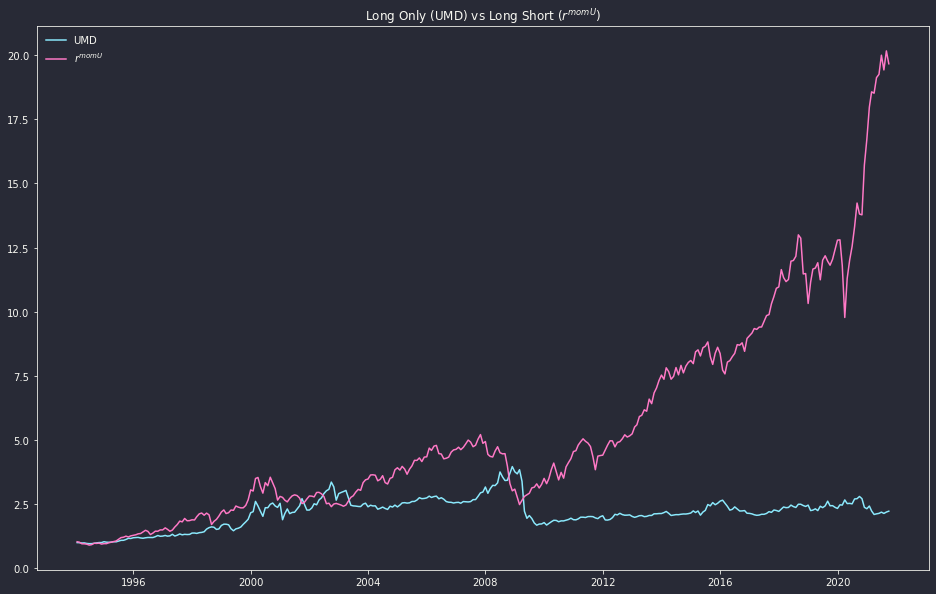

In [7]:
def compound_returns(df, year_mask=None):
    if not(year_mask):
        year_mask = [(str(min(data.index).year), str(max(data.index).year))]
    return (1+df.loc[year_mask[0]:year_mask[1], :]).cumprod()

c_r_mom = compound_returns(r_mom, year_mask)
c_r_momU = compound_returns(r_momU, year_mask)

plt.plot(c_r_mom, label=c_r_mom.columns[0])
plt.plot(c_r_momU, label='$r^{momU}$')
plt.legend()
plt.title("Long Only (UMD) vs Long Short ($r^{momU}$)")
plt.show()

#### 3. Is momentum just data mining, or is it a robust strategy?

Assess how sensitive the threshold for the “winners” and “losers” is in the results. Specifically, we compare three constructions:

• long the top 1 decile and short the bottom 1 deciles

momD3 1 􏰀 mom(8) mom(9) mom(10)􏰁 r ̃ =3r +r +r
1 10 1 3
= 􏰂 rmom(k) − 􏰂 rmom(k)
33
r ̃ =r −r • long the top 3 deciles and short the bottom 3 deciles
k=8 k=1

• long the top 5 deciles and short the bottom 5 deciles

momD1 mom(10)
mom(1)
1 􏰀 mom(1)
−3r +r +r
1 10 1 5
momD5 􏰂 mom(k) 􏰂 mom(k)
r ̃ =5 r −5 r k=6 k=1

(a) Compare all three constructions, (in the full-sample period,) by filling out the stats in the table below for the period 1994-2021.

In [8]:
def generate_decile_port(de, n):
    deciles = de.columns
    l = len(deciles)
    if n > l/2:
        raise ValueError(f"n={n} does not work on a dataset of {l} columns.")
    
    ret = de.iloc[:,0] - de.iloc[:,0]
    for i in range(n):
        c = l-i-1
        ret += de[deciles[c]] - de[deciles[i]]
    return (ret / n).to_frame(f"rD{n}")

r_momD1 = generate_decile_port(de, 1)
r_momD3 = generate_decile_port(de, 3)
r_momD5 = generate_decile_port(de, 5)

r_deciles = pd.concat([r_momD1, r_momD3, r_momD5], axis=1)
ps = pivot_summaries(r_deciles, [("1994", "2021")])
display(ps)

year     1994-2021                                                            
measure       Mean    Vol Sharpe    Skew corr $\tilde{r}^m$ corr $\tilde{r}^v$
variable                                                                      
rD1         0.0731 0.3018 0.2423 -1.3013            -0.3337            -0.2587
rD3         0.0317 0.1947 0.1631 -1.3430            -0.3654            -0.2370
rD5         0.0159 0.1354 0.1173 -1.4285            -0.3583            -0.2312

(b) Do the tradeoffs between the 1-decile, 3-decile, and 5-decile constructions line up with the theoretical tradeoffs we discussed in the lecture?

Increasing the deciles allows the weaker decile constructions (weaker signal) into the portfolio while introducing negligible diversification benefits.

(c) Should AQR’s retail product consider using a 1-decile or 5-decile construction?

AQR's retail product should use the 1-decile construction because it possesses similar correlation to the market and value factors while possessing a superior mean, Sharpe, and skew.

(d) Does r ̃ have similar stats to the Fama-French construction in (1). Recall that construction is also a 3-decile, long-short construction, but it is segmented for small and large stocks. Compare the middle row of Table 3 with the top row of Table 2.

Yes, the 3-decile construction resembles the Fama-French construction. They have means, volatilities, Sharpes, skews, and correlations within a margin of error from one another.

#### 4. Does implementing momentum require trading lots of small stocks—thus causing even larger trading costs?

For regulatory and liquidity reasons, AQR is particularly interested in using larger stocks for their momentum baskets. (Though they will launch one product that focuses on medium-sized stocks.)

Use the data provided on both small-stock “winners”, rmomSU, and small-stock “losers”, rmomSD, to construct a small-stock momentum portfolio,
rmomS = rmomSU − rmomSD ttt
Similarly, use the data provided to construct a big-stock momentum portfolio, rmomB = rmomBU − rmomBD
ttt

(a) Fill out Table 4 over the sample 1994-2021.

(b) Is the attractiveness of the momentum strategy mostly driven by the small stocks? That is, does a momentum strategy in large stocks still deliver excess returns at comparable risk?

Yes, the hedging characteristics of small stock momentum is negligibly different from the Fama French construction. Additionally, it has a superior mean, volatility, and Sharpe relative to the comparable portfolios. In other words, including the big stock momentum drags down the overall portfolio. On the contrary, small momentum has a significantly larger negative tail compared with big momentum, perhaps decreasing its attractiveness from a risk perspective.

In [9]:
r_momS = (ss["SMALL HiPRIOR"]-ss["SMALL LoPRIOR"]).to_frame("$\tilde{r}^{momS}$")
r_momB = (ss["BIG HiPRIOR"]-ss["BIG LoPRIOR"]).to_frame("$\tilde{r}^{momB}$")
mom_sb = pd.concat([r_mom, r_momS, r_momB], axis=1)

ps = pivot_summaries(mom_sb, [("1994", "2021")])
display(ps)

year               1994-2021                                           \
measure                 Mean    Vol Sharpe    Skew corr $\tilde{r}^m$   
variable                                                                
$\tilde{r}^{momB}$    0.0308 0.1837 0.1679 -0.8475            -0.2774   
$\tilde{r}^{momS}$    0.0577 0.1738 0.3321 -1.7289            -0.3093   
UMD                   0.0443 0.1708 0.2592 -1.4104            -0.3065   

year                                   
measure            corr $\tilde{r}^v$  
variable                               
$\tilde{r}^{momB}$            -0.2908  
$\tilde{r}^{momS}$            -0.1925  
UMD                           -0.2543

#### 5. In conclusion, what is your assessment of the AQR retail product?

Is it capturing the important features of the Fama-French construction of momentum? Would you suggest any modifications?

The AQR retail product (long-only) is significantly different from the momentum factor defined by Fama-French (long-short). Although it has a comparable mean and sharpe ratio with the market, it also has a correlation of 0.9, meaning that much of its return is driven by the same reasons as the market. Because it is a diversified long-only portfolio, the AQR product many contain a substantial subsample of assets contained in the market.